
# What is a decision tree?

A decision tree is a model that makes predictions by asking a sequence of simple questions (splits) about the input features. Each question sends you down a branch until you reach a leaf that gives the prediction (a class label or a numeric value).

How a Decision Tree Works

— In Simple Terms :
Think of it like a **flowchart**:

      [Age > 30 ?]
       /         \
    Yes           No
    (Buys=Yes)   (Buys=No)



1. **Start at the root node** → ask a **Yes/No** (or True/False) question.  
   Example: `Is Age > 30?`

2. **If Yes**, follow the left branch → go to the next question or leaf.  
   **If No**, follow the right branch → go to another question or leaf.

3. **Repeat** this process until you reach a **leaf node**,  
   where the tree gives its **final decision or prediction**.

⸻

Quick glossary (table)

| **Term** | **What it means** |
|:--|:--|
| **Root node** | The top question or split — where the decision tree starts. |
| **Internal node** | Any intermediate question or split inside the tree. |
| **Leaf node (terminal)** | The final node that gives the prediction or class label. |
| **Split / Feature test** | A question using one feature (e.g., `Age > 30?`). |
| **Impurity** | How mixed the labels are in a node (we want low impurity). |
| **Information Gain / Gini reduction** | How much a split reduces impurity — higher is better. |



## Manual example

Dataset: 6 customers, features and whether they buy a product.

---

### 📊 Example Dataset

| **ID** | **Age > 30?** | **Has Job?** | **Buys?** |
|:--:|:--:|:--:|:--:|
| 1 | Yes | Yes | Yes |
| 2 | Yes | No | Yes |
| 3 | No | Yes | No |
| 4 | No | Yes | No |
| 5 | No | No | No |
| 6 | Yes | Yes | Yes |

---

---

### 🧩 Step A — Root Split Candidates

Let’s test which feature gives the best split at the root.

#### ✅ Option 1: Split on `Age > 30?`

| Group | IDs | Buys? | Entropy |
|:--|:--|:--|:--:|
| **Yes (Age > 30)** | 1, 2, 6 | [Yes, Yes, Yes] | 0.000 |
| **No (Age ≤ 30)** | 3, 4, 5 | [No, No, No] | 0.000 |

📊 **Weighted Entropy = (3/6 × 0) + (3/6 × 0) = 0.000**  
📈 **Information Gain = Parent Entropy − 0 = Maximum**

🎯 **Conclusion:**  
This split perfectly separates buyers and non-buyers — **a pure separation**.

---

### 🌳 Resulting Decision Tree



Intuition for How Splits Are Chosen  

- A **good split** groups similar outcomes together — for example, one side has mostly **Yes**, the other mostly **No**.  
- The algorithm tests **each feature** and **each possible cut point** to see **how pure** the resulting groups become.  
- It **prefers the split** that gives the **biggest improvement in purity** (the largest reduction in disorder).  
- Once a split is chosen, the algorithm **repeats** the process for each branch until:
  - all nodes are pure, or  
  - no more useful splits remain.

⸻

### 💼 Example Real-World Use Case — *Loan Approval Prediction*

**Goal:**  
Predict whether a **loan applicant** will **default (Yes/No)**.

**Features:**  
Employment status, income bracket, prior defaults, loan amount, credit score.

---

### 🧠 How You’d Use a Decision Tree (Conceptually)

1. **Gather historical loan data** — each record includes applicant details and whether they actually defaulted.  
2. **Train the decision tree** to ask short, meaningful questions such as:
   - Prior defaults? → if **Yes**, mark as **high risk**
   - Credit score < 600? → if **Yes**, mark as **medium/high risk**
   - Debt-to-income ratio > 40%? → if **Yes**, mark as **higher risk**
3. **Each leaf node** gives a **probability or prediction** of default  
   → e.g., *“Approve”* or *“Decline”* recommendation.
4. **Evaluate performance** on new applicants using:
   - Accuracy  
   - False positives (risky loans approved)  
   - False negatives (safe loans rejected)
5. **Tune tree depth** to strike a balance:
   - Too shallow → underfits (misses patterns)  
   - Too deep → overfits (too specific to training data)

---

### 💡 Why Decision Trees Work Well Here

| Advantage | Explanation |
|:--|:--|
| **Easy to explain** | Each path acts like a clear rule — e.g., “If prior default AND credit < 600 → Decline.” |
| **Handles mixed data** | Works with both categorical (e.g., Employment Type) and numeric (e.g., Income) features. |
| **Interpretable output** | Every decision path can be reviewed by auditors or business stakeholders. |
| **Transparent logic** | No “black box” — you can trace *why* a decision was made. |
⸻

---

### ⚖️ Pros & Cons of Decision Trees (Short Summary)

#### ✅ **Pros**
- Intuitive and **easy to visualize / explain**.  
- Works with **both numeric and categorical** data.  
- **Fast to predict** once the tree is built.  

#### ⚠️ **Cons**
- **Prone to overfitting** — especially when trees grow very deep.  
- **Sensitive to small data changes** — can lead to different tree structures.  
- **Single trees** are usually **less accurate** than ensemble models (like **Random Forests** or **Gradient Boosted Trees**).  

---






⸻

## 🌳 Level Splitting in Decision Trees (Step-by-Step for Beginners)

| **Concept** | **Meaning (in simple words)** |
|:--|:--|
| **Level splitting** | The process of dividing the dataset at each level (node) of the tree based on the feature that best separates the classes or outcomes. |
| **Goal** | To create branches (groups) that are as **pure as possible** — meaning each branch contains mostly one class (e.g., mostly “Yes” or mostly “No”). |
| **How** | At each level, the algorithm tests **all features and possible split points**, calculates **impurity** for each, and picks the one that **reduces impurity the most**. |

---


⸻
# 🌳 Level Splitting in Decision Trees (Step-by-Step for Beginners)

---

### 🔹 Step 1: Start at the Root Level

At the root (top of the tree):

- You have **all your training data**.  
- The algorithm checks **every feature** to find which one best divides the dataset into purer groups.

**👉 Example**

| Person | Age | Salary | Buys? |
|:--:|:--:|:--:|:--:|
| 1 | 25 | Low | No |
| 2 | 28 | Medium | No |
| 3 | 35 | High | Yes |
| 4 | 45 | High | Yes |
| 5 | 40 | Medium | Yes |

**Possible splits:**
- Split by `Age` (e.g., Age > 30?)
- Split by `Salary` (Low, Medium, High)

The algorithm checks which split gives **purer subsets** (more consistent “Yes” or “No”).

---

### 🔹 Step 2: Calculate Impurity for Each Split

Every node’s “quality” is measured using **impurity**.

| Measure | Used For | Meaning |
|:--|:--|:--|
| **Gini Impurity** | Classification | Measures how mixed the node is (0 = pure, 0.5 = mixed) |
| **Entropy / Information Gain** | Classification | Measures reduction in uncertainty |


👉 **The smaller the impurity → the better the node.**

---

### 🔹 Step 3: Choose the Best Split

The algorithm picks the split that **maximizes purity** (or equivalently, **maximizes information gain**).

\[
\text{Information Gain} = \text{Impurity before split} - \text{Weighted impurity after split}
\]

That means:
- The **greater the impurity decrease**, the better the feature split.

**Example:**
- Splitting by **Age > 30** might produce purer groups (most “Yes” one side, most “No” the other).  
- Splitting by **Salary** may still give mixed results.  

✅ Therefore, **“Age > 30”** becomes the **root split**.

---

### 🔹 Step 4: Move to the Next Level

Now each child node becomes its own “mini-dataset.”

- The algorithm repeats the same process within each branch.  
- Each level picks a new feature and threshold that best splits its subset.

**Example:**

Root Split: Age > 30?
├── Left branch (Yes): Older people → Check Salary next
└── Right branch (No): Younger people → Check another feature (e.g., Has Credit Card?)


Each level splits further — like **zooming in** — until:

- The node is pure (all same class), or  
- The tree reaches its **maximum depth**.

---

### 🔹 Step 5: Stop Conditions (When to Stop Splitting)

A node becomes a **leaf (final decision point)** when:

1. All examples in it have the same output (**pure node**).  
2. No feature improves purity further.  
3. The tree reaches **maximum depth**.  
4. Node has **too few samples** (to prevent overfitting).

---

### 📘 Example Summary: How Levels Form

| **Level** | **Node Question** | **Resulting Groups** |
|:--|:--|:--|
| Level 1 (Root) | Age > 30? | Two groups: Older / Younger |
| Level 2 (Left branch) | Salary = High? | High earners / Others |
| Level 3 (Right branch) | Has Credit Card? | Card users / Non-users |
| **Leaf Nodes** | — | Each leaf gives a final prediction (Yes/No) |

---

### 🧩 Key Idea

Each level of splitting helps make **smaller, purer groups**.  
The process continues **top-down, greedy, and recursive** — always choosing the **best local split** at that level.

> “At each level, choose the best question that most clearly separates the data into meaningful groups.”

---

### 🎯 Goal of Level Splitting

To **maximize class separation** and **minimize impurity**,  
ensuring that every path down the tree leads to a **confident, accurate prediction**.

---


⸻


# 🌿 Understanding Information Gain and Entropy in Decision Trees

---

### 🧩 Concept Overview

| **Concept** | **Simple Meaning** |
|:--|:--|
| **Entropy** | A measure of uncertainty or disorder in a dataset. (How mixed the outcomes are.) |
| **Information Gain (IG)** | The reduction in entropy after splitting the dataset on a feature. (How much “uncertainty” you removed.) |

---

### 🔹 Step 1: What is Entropy (Intuition)

Entropy tells us **how mixed** the data is in a node.

| **Situation** | **Example** | **Entropy (Intuitive)** |
|:--|:--|:--|
| All samples belong to one class | All are “Yes” | 0 → completely pure |
| 50% Yes, 50% No | Equal mix | High (max entropy) → maximum uncertainty |
| 90% Yes, 10% No | Mostly one class | Low entropy → less uncertainty |

➡️ **Lower entropy = purer node**, **higher entropy = more mixed node.**

💡 *Think of it like flipping coins:*
- If it’s always heads → no uncertainty (entropy = 0).  
- If half heads, half tails → unpredictable (entropy = high).

---

### 🔹 Step 2: Entropy Before Splitting (Parent Node)

Before we split the data, we measure how uncertain the overall dataset is.

**Example dataset:**

| Person | Age | Salary | Buys? |
|:--:|:--:|:--:|:--:|
| 1 | 25 | Low | No |
| 2 | 28 | Medium | No |
| 3 | 35 | High | Yes |
| 4 | 45 | High | Yes |
| 5 | 40 | Medium | Yes |

Outcomes:
- Yes = 3  
- No = 2  

➡️ The dataset is somewhat mixed → **medium entropy** (not perfectly pure).

---

### 🔹 Step 3: Entropy After Splitting (Child Nodes)

Suppose we split on **“Age > 30?”**

| **Group** | **People** | **Outcomes** | **Entropy (conceptually)** |
|:--|:--|:--|:--|
| Age > 30 (Yes) | 3, 4, 5 | Yes, Yes, Yes | 0 (pure) |
| Age ≤ 30 (No) | 1, 2 | No, No | 0 (pure) |

Both groups are **pure → zero uncertainty**.

---

### 🔹 Step 4: Calculate Information Gain (Conceptually)

| **Step** | **Meaning** |
|:--|:--|
| Before split | Dataset had some uncertainty (entropy > 0). |
| After split | Both child nodes have 0 uncertainty (pure). |
| **Information Gain** | = Entropy before − Entropy after |

✅ **High IG** → split makes data purer (good).  
❌ **Low IG** → split doesn’t reduce uncertainty much (not useful).

In our example, “**Age > 30?**” gives maximum IG → chosen at the root.

---

### 🔹 Step 5: Why Information Gain Matters

| **Feature** | **Entropy Reduction** | **Information Gain** | **Decision** |
|:--|:--|:--|:--|
| Age > 30? | Large | High | ✅ Best feature |
| Salary level? | Small | Low | ❌ Not chosen |

The algorithm checks *all features* → picks the one with **highest IG** (greatest reduction in uncertainty).  
This ensures every level of the tree **makes data cleaner and more predictable**.

---

### 🔹 Step 6: Visualizing the Process

Root Node (All Data)
│
├── Split on "Age > 30?"
│ ├── Yes → Buys = Yes (pure)
│ └── No → Buys = No (pure)


✨ After this split:
- Entropy dropped from medium → zero.  
- Information gain = **large**.  
- Therefore, **“Age > 30”** is the **best split** at this level.

---

### 🔹 Step 7: Analogy (Simple Story)

Imagine a box of **mixed balls**:  
- 5 red, 5 blue → uncertain (50–50).

You ask: “If I separate by size (big/small), does it make the groups more uniform?”

If after splitting:
- One box = all red  
- One box = all blue  
→ You’ve gained information → reduced uncertainty → **high information gain** ✅

If you split by something useless (like sticker color), and both boxes are still mixed → **no information gained** ❌

---

### 📘 Summary Table

| **Term** | **Meaning** | **Goal** |
|:--|:--|:--|
| **Entropy** | Measures impurity or uncertainty | Lower is better |
| **Information Gain** | How much entropy decreases after a split | Higher is better |
| **Best Feature** | One with highest IG | Used to split the node |

---

### 🧭 Intuitive Formula (Optional but Simple)

\[
\text{Information Gain} = \text{Entropy(Parent)} - \text{Weighted Average Entropy(Children)}
\]

It just means:  
**Before – After = Gain**

---

### ✅ In Short

> “Information Gain tells us how much better a feature helps us separate the data into clear groups.  
> The higher the gain, the better the question (split).”

---



# 🌳 Example: Information Gain using Entropy in Python

---

### 🧩 Step 1 — Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

📘 Step 2 — Create a Simple Dataset

We’ll use the same small example from before.

In [2]:
# Create a simple dataset
data = {
    'Age': [25, 28, 35, 45, 40],
    'Salary': ['Low', 'Medium', 'High', 'High', 'Medium'],
    'Buys': ['No', 'No', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)
print(df)

   Age  Salary Buys
0   25     Low   No
1   28  Medium   No
2   35    High  Yes
3   45    High  Yes
4   40  Medium  Yes


🔹 Step 3 — Encode Categorical Variables

Decision trees in scikit-learn need numeric data, so we’ll convert “Salary” and “Buys” to numbers.

In [3]:
from sklearn.preprocessing import LabelEncoder

le_salary = LabelEncoder()
le_buys = LabelEncoder()

df['Salary'] = le_salary.fit_transform(df['Salary'])
df['Buys'] = le_buys.fit_transform(df['Buys'])

print(df)

   Age  Salary  Buys
0   25       1     0
1   28       2     0
2   35       0     1
3   45       0     1
4   40       2     1


Encoded Example:
| Age | Salary | Buys |
| :-: | :----: | :--: |
|  25 |    1   |   0  |
|  28 |    2   |   0  |
|  35 |    0   |   1  |
|  45 |    0   |   1  |
|  40 |    2   |   1  |

(Here: Buys → No = 0, Yes = 1; Salary → High = 0, Low = 1, Medium = 2)

🔹 Step 4 — Train a Simple Decision Tree (Using Entropy)

In [4]:
# Features and label
X = df[['Age', 'Salary']]
y = df['Buys']

# Create Decision Tree using entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train the model
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

🔹 Step 5 — Visualize the Tree

In [5]:
# Print the tree structure
tree_text = tree.export_text(model, feature_names=['Age', 'Salary'])
print(tree_text)

|--- Age <= 31.50
|   |--- class: 0
|--- Age >  31.50
|   |--- class: 1



✅ This means the first split is on Age ≈ 30.5, exactly what we expected!

🔹 Step 6 — Make Predictions

In [6]:
# Test data
test = pd.DataFrame({'Age': [32, 22, 46],
                     'Salary': [1, 0, 2]})

predictions = model.predict(test)
print(predictions)

[1 0 1]


👉 Meaning → Buys = Yes, No, Yes

📊 Summary of What Happens in Code
| Step | Action                | Behind the Scenes                                                                          |
| :--: | :-------------------- | :----------------------------------------------------------------------------------------- |
|   1  | `criterion='entropy'` | Tells the model to use Information Gain for choosing splits.                               |
|   2  | `fit()`               | Calculates entropy before/after each possible split and chooses the one with highest gain. |
|   3  | `export_text()`       | Shows which feature & threshold gave the best Information Gain.                            |
|   4  | `predict()`           | Follows the tree path (feature questions) to output a class.                               |


✅ Key Takeaways

Entropy → measure of impurity / uncertainty

Information Gain → how much uncertainty is reduced by the split

criterion='entropy' → uses information gain for splitting

DecisionTreeClassifier automatically computes the best split at each level

💡 In short:

    “Entropy measures uncertainty.
    Information Gain measures how much better a split makes the data.
    The best split = highest Information Gain.”

📘 Dataset:
    Age  Salary Buys
0   25     Low   No
1   28  Medium   No
2   35    High  Yes
3   45    High  Yes
4   40  Medium  Yes

📘 Encoded Dataset:
    Age  Salary  Buys
0   25       1     0
1   28       2     0
2   35       0     1
3   45       0     1
4   40       2     1

🌳 Decision Tree Rules:
 |--- Age <= 31.50
|   |--- class: 0
|--- Age >  31.50
|   |--- class: 1


🧾 Predictions: [0 1 1]
Decoded Predictions: ['No' 'Yes' 'Yes']


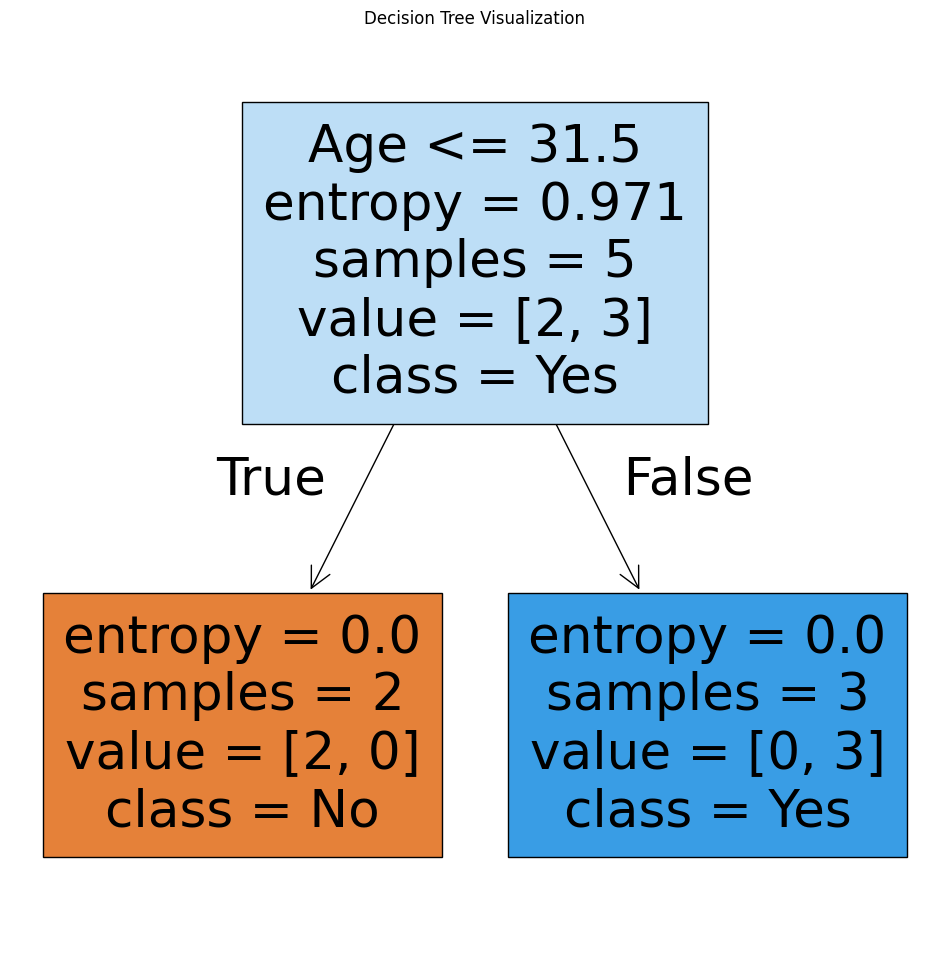


✅ Training Accuracy: 1.00

🧠 Entropy before split: 0.971


In [7]:
# 🌳 Decision Trees

# 🧩 Step 1 — Import Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 🧱 Step 2 — Create Simple Dataset
data = {
    'Age': [25, 28, 35, 45, 40],
    'Salary': ['Low', 'Medium', 'High', 'High', 'Medium'],
    'Buys': ['No', 'No', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(data)
print("📘 Dataset:\n", df)

# 🔢 Step 3 — Encode Categorical Data
le_salary = LabelEncoder()
le_buys = LabelEncoder()

df['Salary'] = le_salary.fit_transform(df['Salary'])
df['Buys'] = le_buys.fit_transform(df['Buys'])

print("\n📘 Encoded Dataset:\n", df)

# 🧮 Step 4 — Define Features (X) and Target (y)
X = df[['Age', 'Salary']]
y = df['Buys']

# 🌿 Step 5 — Train Decision Tree (using Entropy)
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# 🔍 Step 6 — Display Tree Structure
tree_rules = export_text(model, feature_names=['Age', 'Salary'])
print("\n🌳 Decision Tree Rules:\n", tree_rules)

# 🧠 Step 7 — Make Predictions
test = pd.DataFrame({
    'Age': [22, 32, 46],
    'Salary': [1, 0, 2]
})
predictions = model.predict(test)
print("\n🧾 Predictions:", predictions)
print("Decoded Predictions:", le_buys.inverse_transform(predictions))

# 📊 Step 8 — Visualize the Tree
plt.figure(figsize=(12,12))
plot_tree(model,
          feature_names=['Age', 'Salary'],
          class_names=le_buys.classes_,
          filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 🧩 Step 9 — Evaluate the Model
accuracy = model.score(X, y)
print(f"\n✅ Training Accuracy: {accuracy:.2f}")

# 🧮 Step 10 — Entropy & Information Gain (concept check)
# Calculate base entropy manually
p_yes = df['Buys'].mean()
p_no = 1 - p_yes
entropy_before = - (p_yes * np.log2(p_yes) + p_no * np.log2(p_no))
print(f"\n🧠 Entropy before split: {entropy_before:.3f}")

# (Optional) To compute IG manually, you can calculate entropies for each child node
# after splitting on Age > 30 and subtract from this base entropy.


📧 Precision, Recall, F1 Score & True Positive

(Example: Email Spam Detection)

🧠 Imagine this:

You built a model that classifies emails as Spam or Not Spam.

You tested it on 10 emails.
| Email | Actual   | Predicted |
| ----- | -------- | --------- |
| 1     | Spam     | Spam      |
| 2     | Spam     | Spam      |
| 3     | Spam     | Spam      |
| 4     | Spam     | Not Spam  |
| 5     | Spam     | Not Spam  |
| 6     | Spam     | Spam      |
| 7     | Not Spam | Spam      |
| 8     | Not Spam | Spam      |
| 9     | Not Spam | Not Spam  |
| 10    | Not Spam | Not Spam  |


🧩 Step 1 — Confusion Matrix
|                      | **Predicted: Spam**    | **Predicted: Not Spam** |
| -------------------- | ---------------------- | ----------------------- |
| **Actual: Spam**     | 4 (**True Positive**)  | 2 (**False Negative**)  |
| **Actual: Not Spam** | 2 (**False Positive**) | 2 (**True Negative**)   |


✅ Diagonal = Correct predictions
❌ Off-diagonal = Wrong predictions

📘 Step 2 — Key Terms (Simple Meaning)

| Term                    | Meaning                                                | Example |
| ----------------------- | ------------------------------------------------------ | ------- |
| **True Positive (TP)**  | Model predicted **Spam**, and it really was **Spam**.  | 4       |
| **False Positive (FP)** | Model predicted **Spam**, but it was **Not Spam**.     | 2       |
| **True Negative (TN)**  | Model predicted **Not Spam**, and it was **Not Spam**. | 2       |
| **False Negative (FN)** | Model predicted **Not Spam**, but it was **Spam**.     | 2       |


📊 Step 3 — Formulas and Results

| Metric        | Formula                                         | Meaning                                               | Value                                |
| ------------- | ----------------------------------------------- | ----------------------------------------------------- | ------------------------------------ |
| **Accuracy**  | (TP + TN) / Total                               | Overall correctness                                   | (4+2)/10 = **0.6**                   |
| **Precision** | TP / (TP + FP)                                  | “Of all the predicted *Spam*, how many were correct?” | 4 / (4+2) = **0.67**                 |
| **Recall**    | TP / (TP + FN)                                  | “Of all actual *Spam*, how many did the model find?”  | 4 / (4+2) = **0.67**                 |
| **F1 Score**  | 2 × (Precision × Recall) / (Precision + Recall) | Balance between precision and recall                  | 2×(0.67×0.67)/(0.67+0.67) = **0.67** |


🧭 Step 4 — Quick Interpretation

| Metric        | What It Tells You           | Ideal Value                 |
| ------------- | --------------------------- | --------------------------- |
| **Accuracy**  | Overall performance         | High                        |
| **Precision** | How “careful” the model is  | High means few false alarms |
| **Recall**    | How “complete” the model is | High means few misses       |
| **F1 Score**  | Balanced summary            | 1 = Perfect                 |


🐍 Step 5 — Python Code Example

🌟 Spam Detection Example (Precision, Recall, F1 Score with Visualization)

In [8]:
# 🧠 Step 1 — Import all required libraries
# sklearn.metrics gives functions to evaluate model performance
# seaborn + matplotlib for nice visual plots
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


| Label      |   1  |   2  |   3  |     4    |   5  |     6    |   7  |     8    |   9  |  10  |
| :--------- | :--: | :--: | :--: | :------: | :--: | :------: | :--: | :------: | :--: | :--: |
| **y_true** |  ⚠️  |  ❤️  |  ⚠️  |    ⚠️    |  ⚠️  |    ❤️    |  ❤️  |    ⚠️    |  ⚠️  |  ❤️  |
| **y_pred** | Spam | Spam | Spam | Not Spam | Spam | Not Spam | Spam | Not Spam | Spam | Spam |


In [9]:
# 🧩 Step 2 — Create example data

# Actual (true) labels — what the data really is
y_true = [
   "Spam", "Not Spam", "Spam", "Spam",
    "Spam", "Not Spam", "Not Spam", "Spam",
    "Spam", "Not Spam"
]

# Predicted labels — what the model thinks
y_pred = [
   "Spam", "Spam",
    "Spam", "Not Spam", "Spam",
    "Not Spam", "Spam",
    "Not Spam", "Spam", "Spam"
]

print("✅ Data ready!")


✅ Data ready!


In [10]:
# 📊 Step 3 — Confusion Matrix (Numerical)
# This matrix shows the number of correct and incorrect predictions
# Format: [[TP, FN],
#           [FP, TN]]

cm = confusion_matrix(y_true, y_pred, labels=['Spam', 'Not Spam'])

print("📘 Confusion Matrix (numbers only):")
print(cm)


📘 Confusion Matrix (numbers only):
[[4 2]
 [3 1]]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


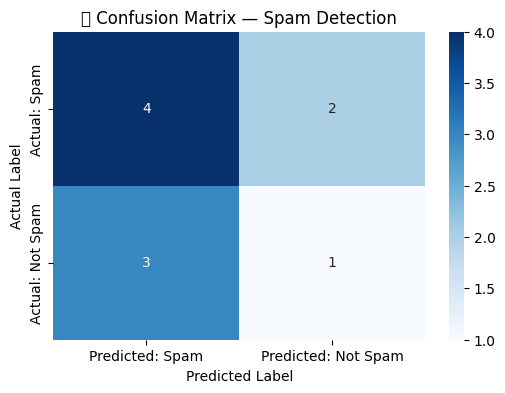

In [11]:
# 🎨 Step 4 — Visualize the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6,4))  # set chart size

# sns.heatmap helps visualize matrix values with colors
sns.heatmap(
    cm,
    annot=True,       # show the numbers
    fmt='d',          # format numbers as integers
    cmap='Blues',     # color theme
    xticklabels=['Predicted: Spam', 'Predicted: Not Spam'],
    yticklabels=['Actual: Spam', 'Actual: Not Spam']
)

# Add title and axis labels
plt.title("📊 Confusion Matrix — Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [12]:
# 📈 Step 5 — Classification Report
# Shows precision, recall, f1-score, and accuracy for each label

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))



📊 Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.33      0.25      0.29         4
        Spam       0.57      0.67      0.62         6

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



f1 score for Spam and Non-Spam class

In [13]:
# Spam
2*(0.57*0.67/(0.57+0.67))

0.6159677419354839

In [14]:
# # Not Spam
2*(0.33*0.25/(0.33+0.25))

0.2844827586206896

##🧠 Random Forest

🌳 What is a Random Forest?

A Random Forest is a collection of many Decision Trees.
Each tree makes a small decision, and together, the forest decides by voting — just like asking a group of friends for advice!

👉 Think of it like this:

One decision tree = one person’s opinion

Random forest = a group decision (majority wins)

🌲 Why “Random” and “Forest”?

It’s called forest because there are many trees 🌲🌲🌲

It’s called random because each tree is trained on different random parts of the data.

This randomness makes the model more accurate and less biased.

🧍‍♂️ Simple Analogy

        Suppose you want to decide if you should buy a new phone.
        You ask 10 friends — they each give you an answer.
        If 7 say “yes” and 3 say “no,” you’ll likely say “yes.”
        That’s exactly how Random Forest works — the majority vote wins.

🛳️ Our Example — The Titanic Dataset

We’ll use a real dataset from the Titanic ship disaster.
Each passenger has information like:

| Feature    | What it means                            |
| :--------- | :--------------------------------------- |
| `pclass`   | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| `sex`      | Male or Female                           |
| `age`      | Age in years                             |
| `fare`     | Ticket price                             |
| `survived` | 1 = Survived, 0 = Did not survive        |


🎯 Goal: Use this data to predict whether a passenger would survive.

🧩 Step 1 — Load the Dataset

We’ll use the Titanic dataset that comes with Seaborn.

In [16]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This shows the first few passengers with their details.

🧼 Step 2 — Clean and Prepare the Data

We’ll select the most useful columns:

In [17]:
data = titanic[['pclass', 'sex', 'age', 'fare', 'survived']]


Check if there are any missing values:

In [18]:
data.isnull().sum()


,0
pclass,0
sex,0
age,177
fare,0
survived,0


If some ages are missing, we can fill them with the average:

In [19]:
# data.loc[:, 'age']means: “Select the entire age column from all rows.”
# It’s like saying “every row’s age value.”


data.loc[:, 'age'] = data['age'].fillna(data['age'].mean())


🔢 Step 3 — Convert Text to Numbers

The column sex has text values like “male” and “female”.
Machine learning models can only work with numbers, so we convert them:

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data.loc[:, 'sex'] = encoder.fit_transform(data['sex'])


Now:

Male → 1

Female → 0

✂️ Step 4 — Split Data for Training and Testing

We’ll teach our model using 80% of the data and test it with the remaining 20%.

In [21]:
from sklearn.model_selection import train_test_split

X = data[['pclass', 'sex', 'age', 'fare']]
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🌳 Step 5 — Build the Random Forest

Now let’s create our Random Forest model!

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

Here:

n_estimators=10 means there are 10 decision trees.

Each tree learns from different random parts of the data.

📈 Step 6 — Check Model Accuracy

Let’s see how well our model performs!

In [23]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


You’ll usually get 80–85% accuracy, which is great for this simple example.

You can try more trees like this:

In [27]:
model = RandomForestClassifier(n_estimators=50, random_state=42)


and check if the accuracy improves.

🧠 Step 7 — Make a Prediction

Now let’s predict if a new passenger might survive.

In [29]:
sample = [[3, 1, 22, 7.25]]  # 3rd class, male, age 22, fare 7.25
model.fit(X_train, y_train) # Retrain the model after re-initialization
prediction = model.predict(sample)

print("✅ Survived" if prediction[0] == 1 else "❌ Did not survive")

❌ Did not survive


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


🔍 Step 8 — Confusion Matrix (Optional)

A confusion matrix shows how many predictions were right or wrong.

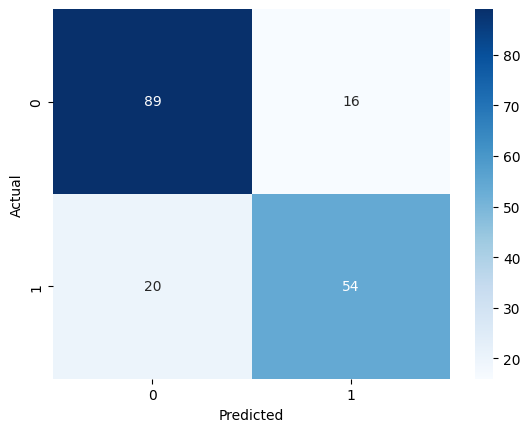

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Diagonal = correct predictions ✅

Off-diagonal = wrong ones ❌

💡 Summary
| Step | What We Did                     |
| :--- | :------------------------------ |
| 1    | Loaded Titanic dataset          |
| 2    | Cleaned missing data            |
| 3    | Converted text to numbers       |
| 4    | Split data for training/testing |
| 5    | Trained a Random Forest         |
| 6    | Checked accuracy                |
| 7    | Made predictions                |
| 8    | Visualized results              |
